In [11]:
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

candles csv from:

(a) https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/ccxt_candles_ta_to_csv.py

(b) https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/futu_candles_ta_to_csv.py

In [41]:
MAX_NUM_DAYS : int = 7*2
candles = pd.read_csv('candles_ta_BTC.csv')
candles['datetime'] = pd.to_datetime(candles['datetime'])
candles = candles.iloc[-MAX_NUM_DAYS*24:] # Trailing MAX_NUM_DAYS days
candles

,Unnamed: 0,exchange,symbol,timestamp_ms,open,high,low,close,volume,datetime,...,normalized_hurst_exp_slope,normalized_hurst_exp_slope_min,normalized_hurst_exp_slope_max,normalized_hurst_exp_slope_idmin,normalized_hurst_exp_slope_idmax,fib_0.618_short_periods,fib_0.618_long_periods,gap_close_vs_ema,close_above_or_below_ema,close_vs_ema_inflection
22451,22451,OKX,BTC/USDT:USDT,1753326000000,119010.7,119325.0,118513.9,118550.1,2653.4024,2025-07-24 11:00:00,...,-0.217793,-0.874917,-0.217793,22350.0,22451.0,118396.2678,118063.5984,-40.090498,below,NaN
22452,22452,OKX,BTC/USDT:USDT,1753329600000,118550.0,118629.9,117858.0,117979.1,3849.4519,2025-07-24 12:00:00,...,-0.213569,-0.874917,-0.213569,22350.0,22452.0,118688.6876,118063.5984,-562.203258,below,NaN
22453,22453,OKX,BTC/USDT:USDT,1753333200000,117979.1,118013.3,117522.0,117640.1,3463.2867,2025-07-24 13:00:00,...,-0.209371,-0.874917,-0.209371,22350.0,22453.0,118559.1896,118063.5984,-829.106998,below,NaN
22454,22454,OKX,BTC/USDT:USDT,1753336800000,117640.0,117912.8,117400.0,117497.3,3119.9826,2025-07-24 14:00:00,...,-0.206066,-0.874917,-0.206066,22350.0,22454.0,118504.6400,118063.5984,-894.154438,below,-1.0
22455,22455,OKX,BTC/USDT:USDT,1753340400000,117497.3,118518.1,117104.3,118436.8,6165.3883,2025-07-24 15:00:00,...,-0.209296,-0.874917,-0.206066,22350.0,22454.0,118504.6400,118063.5984,41.717917,above,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,22782,OKX,BTC/USDT:USDT,1754517600000,115000.0,115160.0,114986.5,115035.7,942.8530,2025-08-07 06:00:00,...,-0.296176,-0.421581,1.000000,22658.0,22731.0,115280.7334,114175.1272,439.593391,above,NaN
22783,22783,OKX,BTC/USDT:USDT,1754521200000,115035.8,115060.0,114924.2,114944.0,548.0757,2025-08-07 07:00:00,...,-0.328959,-0.402921,1.000000,22659.0,22731.0,115266.9050,114175.1272,320.061920,above,NaN
22784,22784,OKX,BTC/USDT:USDT,1754524800000,114944.1,114976.2,114807.1,114855.8,771.8170,2025-08-07 08:00:00,...,-0.357980,-0.386740,1.000000,22660.0,22731.0,115233.2126,114175.1272,213.312966,above,NaN
22785,22785,OKX,BTC/USDT:USDT,1754528400000,114855.8,115150.0,114538.0,114704.1,1655.3952,2025-08-07 09:00:00,...,-0.390132,-0.390132,1.000000,22785.0,22731.0,115121.8062,114175.1272,56.683929,above,1.0


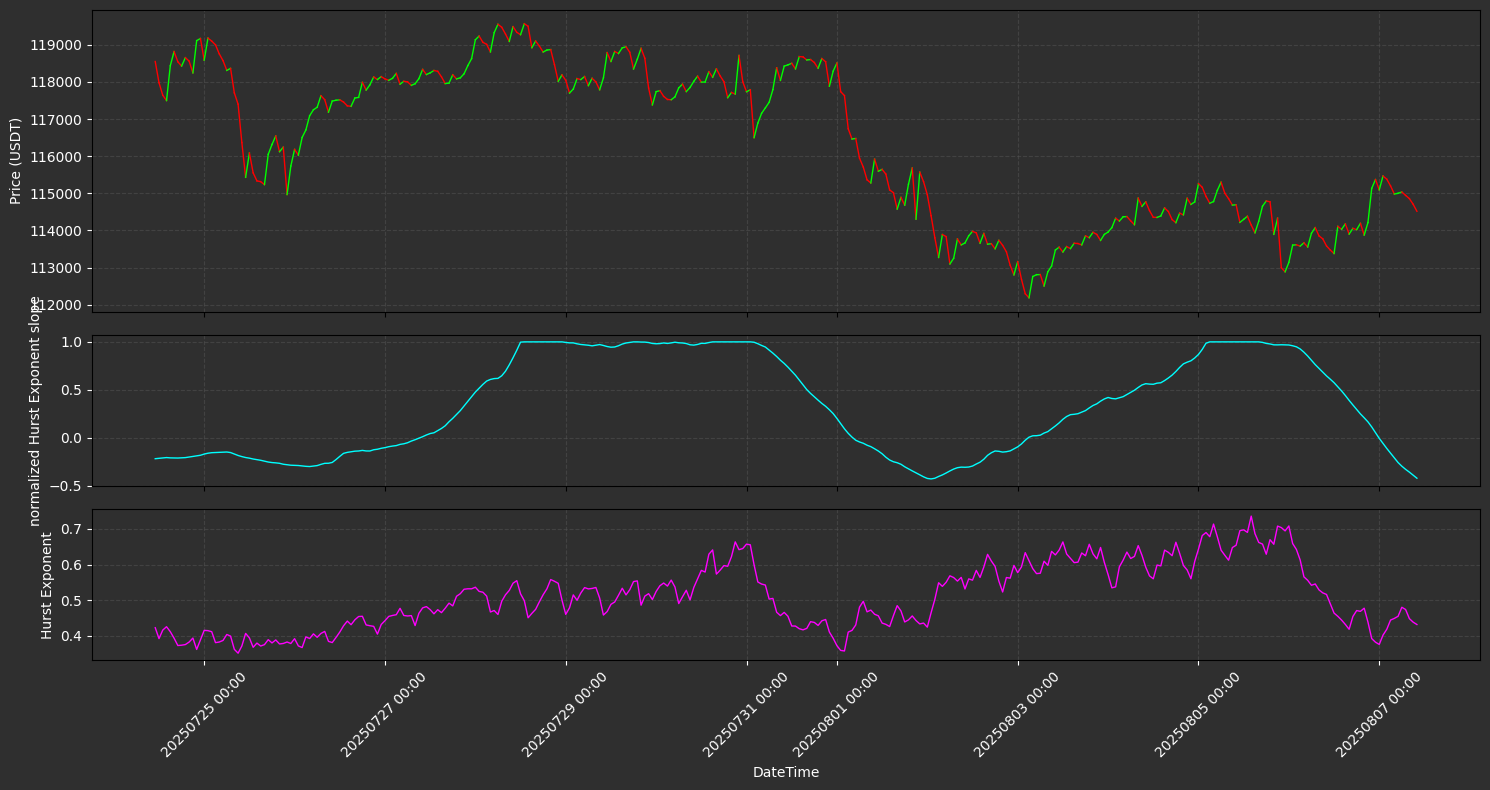

In [42]:
candles['color'] = ['#00FF00'] + ['#00FF00' if candles['close'].iloc[i] >= candles['close'].iloc[i-1] else '#FF0000' for i in range(1, len(candles))]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), facecolor='#2F2F2F', sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})

ax1.set_facecolor('#2F2F2F')
for i in range(1, len(candles)):
    ax1.plot(candles['datetime'].iloc[i-1:i+1], candles['close'].iloc[i-1:i+1], color=candles['color'].iloc[i], linewidth=1)
ax1.set_ylabel('Price (USDT)', color='#FFFFFF')
ax1.tick_params(axis='y', colors='#FFFFFF')
ax1.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax2.set_facecolor('#2F2F2F')
ax2.plot(candles['datetime'], candles['normalized_hurst_exp_slope'], color='#00FFFF', linewidth=1)
ax2.set_ylabel('normalized Hurst Exponent slope', color='#FFFFFF')
ax2.tick_params(axis='y', colors='#FFFFFF')
ax2.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax3.set_facecolor('#2F2F2F')
ax3.plot(candles['datetime'], candles['hurst_exp'], color='#FF00FF', linewidth=1)
ax3.set_ylabel('Hurst Exponent', color='#FFFFFF')
ax3.tick_params(axis='y', colors='#FFFFFF')
ax3.set_xlabel('DateTime', color='#FFFFFF')
ax3.tick_params(axis='x', colors='#FFFFFF', rotation=45)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d %H:%M'))
ax3.grid(True, color='#555555', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()